![Sunny Savita - End to End RAG App with Hugging face Google Gemma & MongoDB Vector Search #rag #ai #llm #genai [dUWhUdW79Xs - 782x440 - 3m59s].png](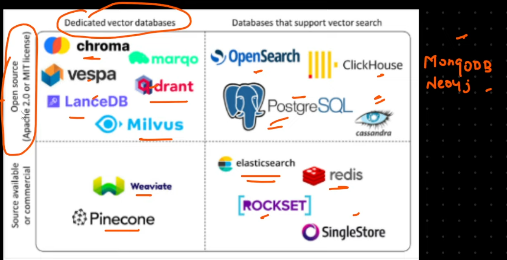)

**Install Vertex AI SDK for Python**

In [ ]:
!pip install --upgrade --user google-cloud-aiplatform

In [ ]:
!pip install ragstack-ai

![Sunny Savita - Chat With Multiple Documents(pdfs, docs, txt, pptx etc.) using AstraDB and Langchain #rag #ai [WWorF-UMCKw - 782x440 - 9m24s].png](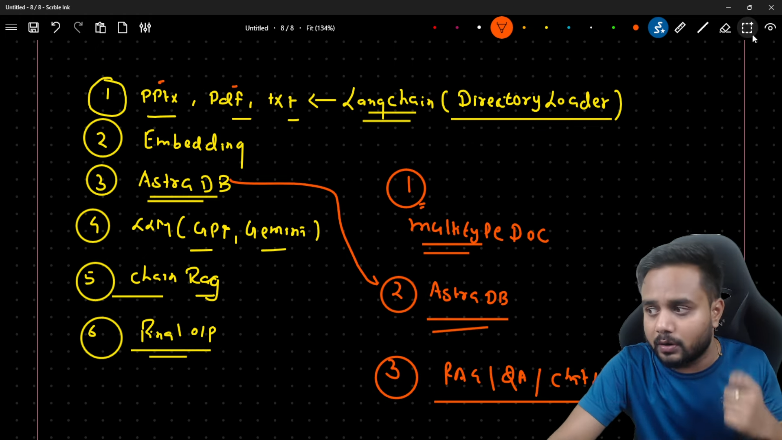)

In [ ]:
!pip install langchain-community

In [ ]:
!pip install unstructured

In [ ]:
!pip install "unstructured[pdf]"

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (1,680 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 12363

In [ ]:
!sudo apt update && sudo apt install -y libleptonica-dev tesseract-ocr libtesseract-dev python3-pil && pip install pytesseract


In [ ]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

In [ ]:
!pip install "unstructured[pptx]"

In [ ]:
!pip install langchain_astradb

In [ ]:
!pip install langchain-google-genai datasets pypdf

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

In [ ]:
import nltk

# Download the 'punkt' tokenizer (includes punkt_tab)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
!pip install python-pptx

In [ ]:
loader = DirectoryLoader("/content/docs")

In [ ]:
loader

In [ ]:
documents = loader.load()

In [ ]:
# Display loaded documents
for i, doc in enumerate(documents, start=1):
    print(f"Document {i}: {doc.metadata}")
    print(doc.page_content[:200], "...")

Document 1: {'source': '/content/docs/DNA_Data_Storage.pptx'}
Data Storage in DNA

Encoding the Indian National Anthem into DNA Sequence

Prabhav Singh

BT21BTECH11004

Deep DNA storage: Scalable and robust DNA storage via coding theory and deep learning. / Bar- ...
Document 2: {'source': '/content/docs/eqtl_2_pages.pdf'}
Plant Biotechnology Journal (2022) 20, pp. 2357–2371

doi: 10.1111/pbi.13912

eQTLs play critical roles in regulating gene expression and identifying key regulators in rice Chang Liu1, Xiya Zhu1, Jin  ...
Document 3: {'source': '/content/docs/nike_shoe_description.txt'}
Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white. Here are some more details about the Nike Ai ...


In [ ]:
splitter = RecursiveCharacterTextSplitter(chunk_size = 512, chunk_overlap=64)

In [ ]:
docs = loader.load_and_split(text_splitter = splitter)

In [ ]:
len(docs)

64

In [ ]:
# Display loaded chunked documents
for i, doc in enumerate(docs, start=1):
    print("*********************************")
    print(f"Document {i}: {doc.metadata}")
    print(doc.page_content[:200], "...")

*********************************
Document 1: {'source': '/content/docs/DNA_Data_Storage.pptx'}
Data Storage in DNA

Encoding the Indian National Anthem into DNA Sequence

Prabhav Singh

BT21BTECH11004

Deep DNA storage: Scalable and robust DNA storage via coding theory and deep learning. / Bar- ...
*********************************
Document 2: {'source': '/content/docs/DNA_Data_Storage.pptx'}
‹#›

Methodology Used in the Paper

The paper introduces a modular approach to DNA data storage that leverages deep neural networks (DNN), error-correcting codes (ECC), and a safety margin mechanism t ...
*********************************
Document 3: {'source': '/content/docs/DNA_Data_Storage.pptx'}
Encoding to DNA Sequences: Binary data is mapped to DNA bases (A, C, G, T), creating DNA sequences.

Synthesis and Storage: DNA synthesizers generate multiple copies of these sequences, which are stor ...
*********************************
Document 4: {'source': '/content/docs/DNA_Data_Storage.pptx'}
E

In [ ]:
import os
from langchain_core.documents import Document
from langchain_community.document_loaders import PyPDFLoader

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
# from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings

In [ ]:
import os
from google.colab import userdata

# OPENAI_API_TOKEN = userdata.get('OPENAI_API_KEY')
# os.envirenment['OPENAI_API_KEY'] = OPENAI_API_TOKEN

GEMINI_API_TOKEN = userdata.get("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GEMINI_API_TOKEN

In [ ]:
# embeddings = OpenAIEmbeddings()
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [ ]:
# vector = embeddings.embed_query("hello, world!")
# print(vector[:5],"\n", len(vector))

[0.05168594419956207, -0.030764883384108543, -0.03062233328819275, -0.02802734263241291, 0.01813093200325966] 
 768


In [ ]:
# vectors = embeddings.embed_documents(
#     [
#         "Today is Monday",
#         "Today is Tuesday",
#         "Today is April Fools day",
#     ]
# )
# len(vectors), len(vectors[0])
# each sentence 768 numerical features me bat gye

(3, 768)

In [ ]:
from langchain_astradb import AstraDBVectorStore
from langchain.indexes import VectorstoreIndexCreator

ASTRA_DB_API_ENDPOINT = "****************************************************"
ASTRA_DB_APPLICATION_TOKEN = "******************************************************"
ASTRA_DB_KEYSPACE = "default_keyspace"

In [ ]:
len(docs)

64

In [ ]:
vstore = AstraDBVectorStore(
    embedding = embeddings,
    collection_name = "multidoc_vector",
    api_endpoint = ASTRA_DB_API_ENDPOINT,
    token = ASTRA_DB_APPLICATION_TOKEN,
    namespace = ASTRA_DB_KEYSPACE
)

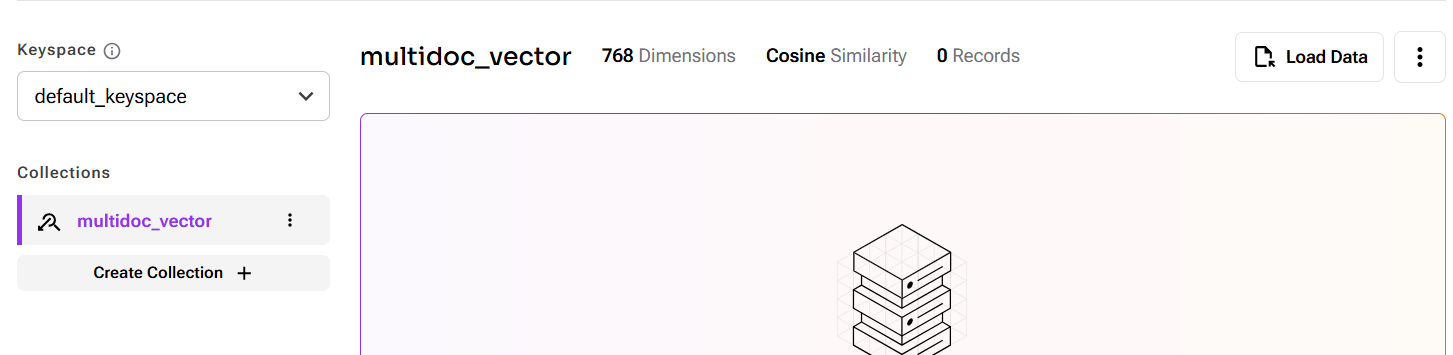

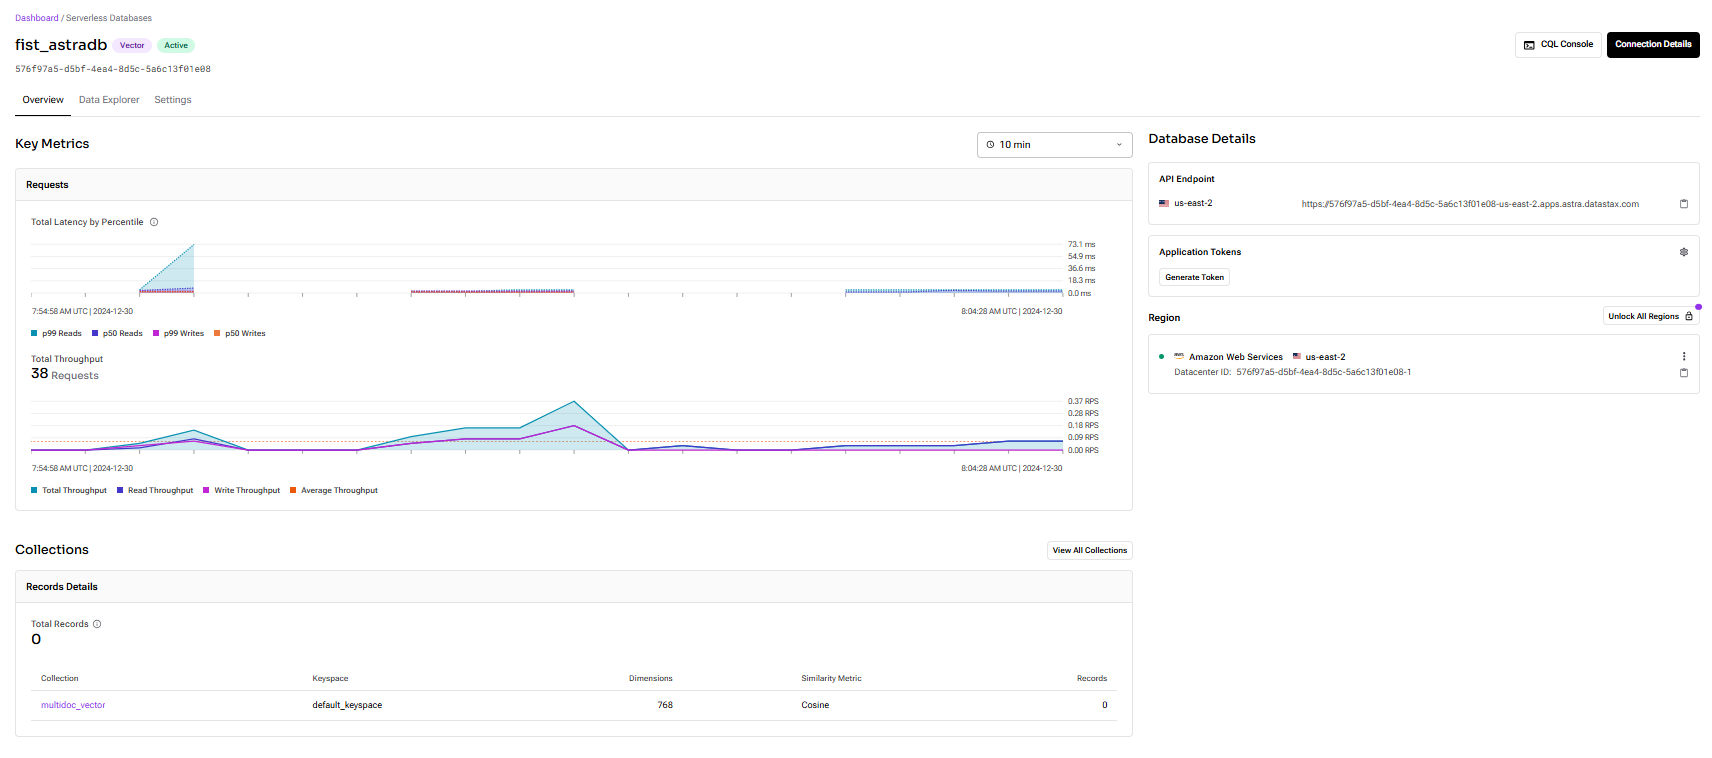

In [ ]:
inserted_ids = vstore.add_documents(docs)

So inserted 64 documents successfully.

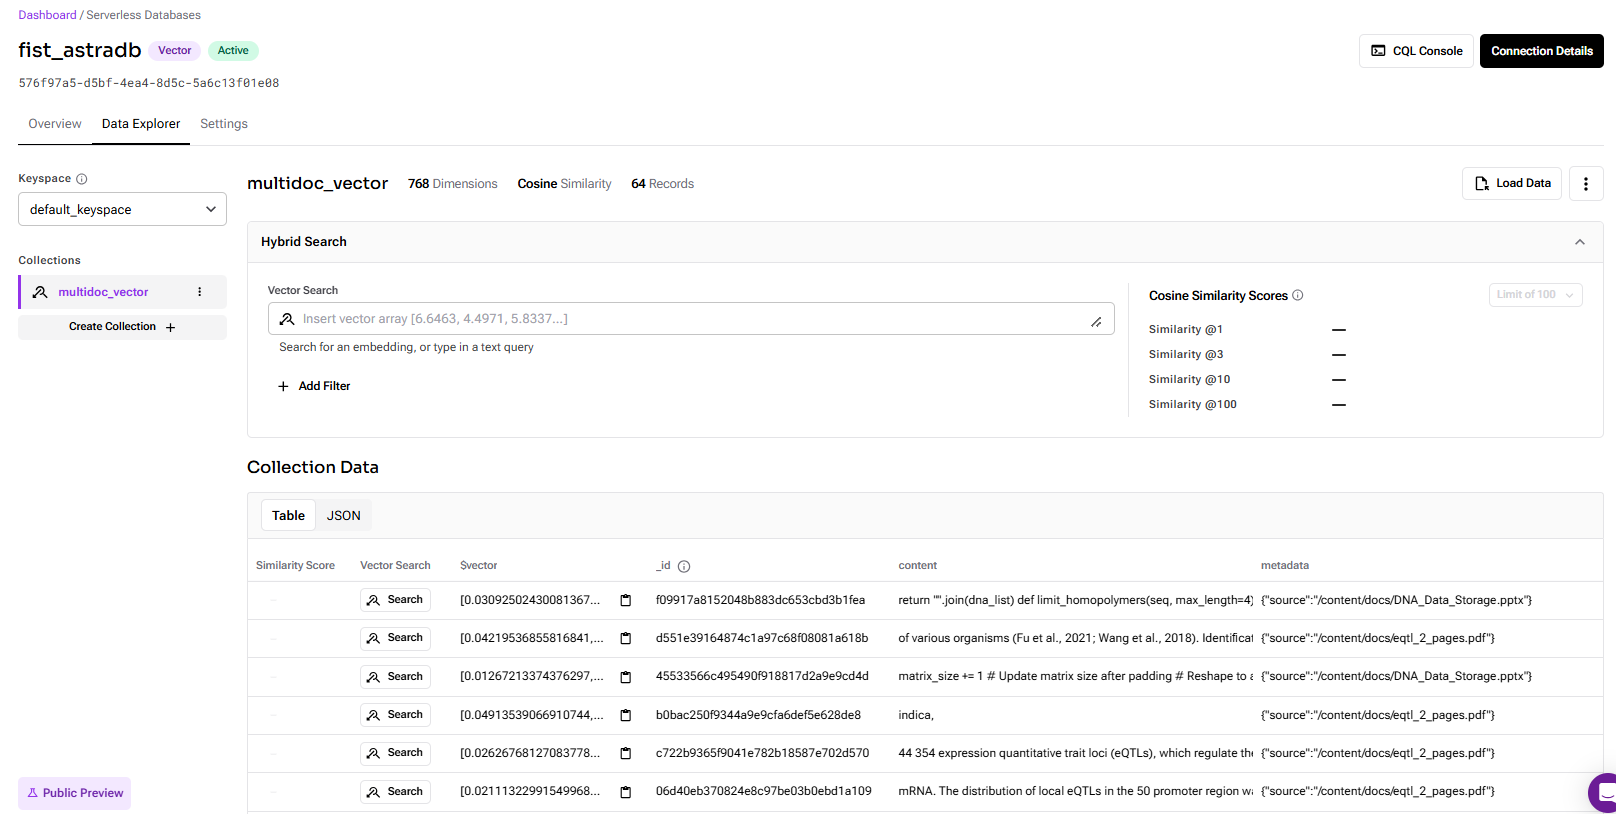

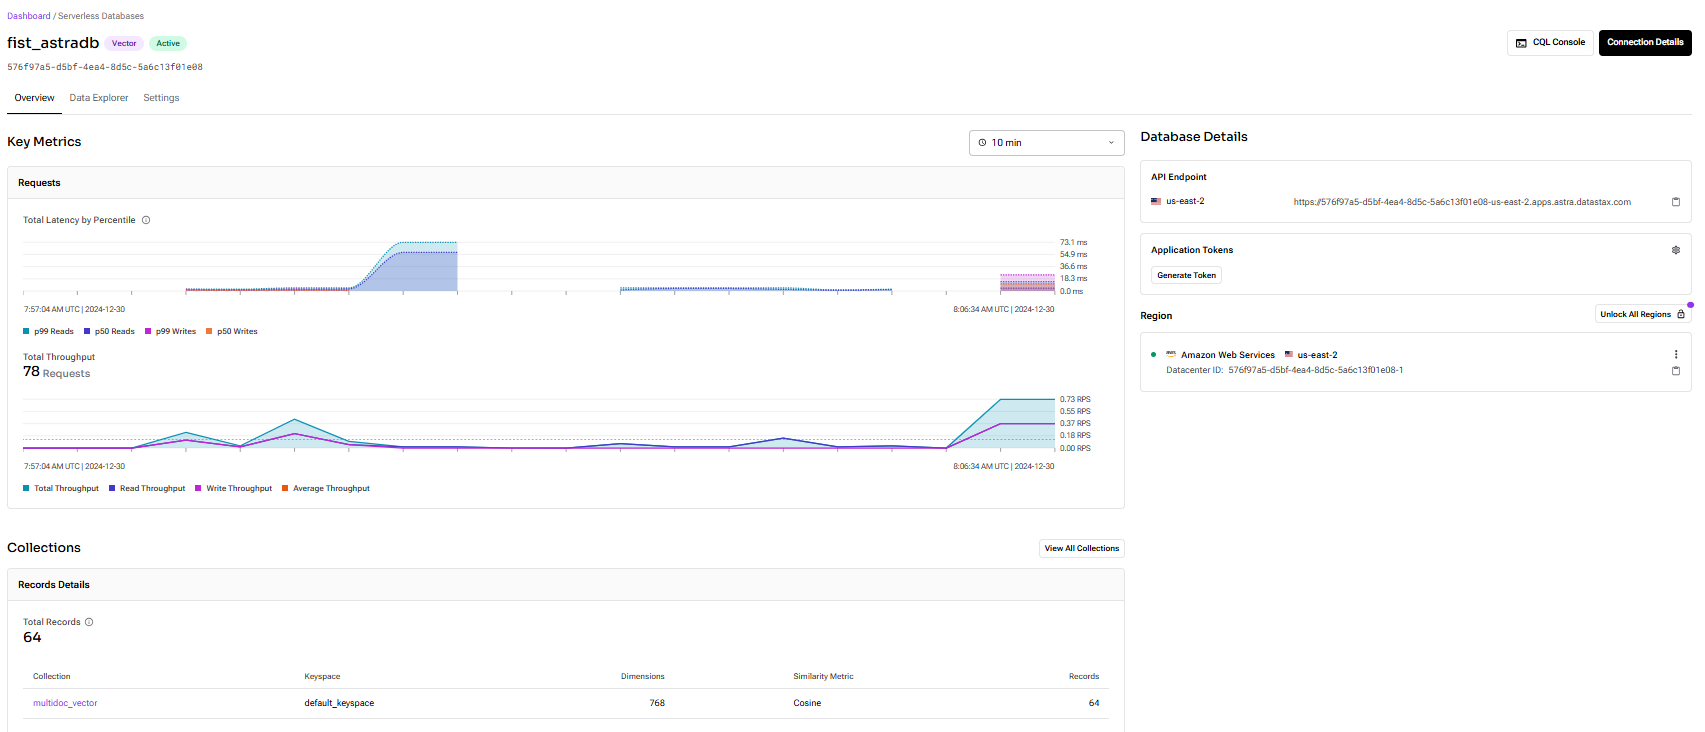

# Data ingestion pipeline has been completed now.

# creating RAG on the top of it

In [ ]:
retriever = vstore.as_retriever(search_kwargs={"k":3})

In [ ]:
retriever

VectorStoreRetriever(tags=['AstraDBVectorStore', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_astradb.vectorstores.AstraDBVectorStore object at 0x7b4089c61780>, search_kwargs={'k': 3})

In [ ]:
prompt_template = """
Generate concise responses from the provided context.

CONTEXT : {context}
QUESTION : {question}

YOUR ANSWER :
"""

In [ ]:
prompt_template = ChatPromptTemplate.from_template(prompt_template)

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## llm = ChatOpenAI()

In [ ]:
chain = (
    {"context" : retriever , "question":RunnablePassthrough()}
    | prompt_template
    | llm
    | StrOutputParser()
)

In [ ]:
chain.invoke("Can you tell me about the code of data storage in DNA")

'Binary data is encoded into DNA sequences by mapping it to the four DNA bases (A, C, G, T).  Tensor-Product (TP) error-correcting codes are used to handle errors during synthesis and sequencing.  Retrieval involves clustering similar DNA reads, reconstructing the original sequence, and decoding back to binary.\n'

In [ ]:
chain.invoke("Can you tell me about Indian Railway")

'This document set does not contain information about Indian Railways.\n'

In [ ]:
chain.invoke("Can you tell me about eQTL. How many genere and eQTL were found and studied along with types")

'eQTL studies combine GWAS with gene expression data to identify SNPs associated with gene expression variation.  One study found 14,562 genes (eGenes) significantly associated with at least one SNP, clustered into eQTL blocks.  Both local (greater effect) and distant eQTLs were identified.  The study also looked at growth and phenotypic variations in poplar and metabolic breeding in tomato.\n'

In [ ]:
chain.invoke("What do you know about nike sandles?")

'Nike slide/sandals are unisex with a soft, one-piece synthetic upper, Phylon midsole, rubber outsole, and Swoosh logo.  The Benassi Solarsoft Sandal is available in various colors like black, white, and beige.  A Nike off-court slides store is located in Bhaktapur, Nepal.\n'

In [ ]:
chain.invoke("Can you please write the full python code used for dna data storage?")

'The provided text snippets show code for saving a DNA sequence to a text file, splitting it into 100-character lines.  It also mentions using a DNN called DNAformer for reconstruction and Reed-Solomon/tensor-product codes for error correction.  However, the full code for DNA data storage is not present in these excerpts.  It only shows the final step of saving the DNA sequence, not the encoding process itself.\n'

In [ ]:
chain.invoke("Can you please write the python code used for dna data storage?")

'```python\nwith open("final_dna_sequence_for_JGM.txt", "w") as file:\n    for i in range(0, len(dna_sequence), 100):\n        file.write(dna_sequence[i:i+100] + "\\n")\nprint("Binary data saved to dna_sequence.TXT")\n\n```\n'

In [ ]:
chain.invoke("Please give summary of everythong you know?")

'* **eqtl_2_pages.pdf:**  Gene expression analysis using Fast-LMM software found 14,562 genes significantly associated with at least one SNP.  SNPs associated with the same gene were clustered into eQTL blocks.\n* **nike_shoe_description.txt:** Describes Nike slide/sandals, highlighting the soft upper, Phylon midsole, rubber outsole, Swoosh logo, and color variety.\n'